
### The Tips dataset contains some tipping information that was compiled by a waiter over a few months of employment in a single restaurant. Each tip was noted in the dataset.
### Tips dataset is a data frame with 244 rows and 7 variables 

In [2]:
# importing modules

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=sns.load_dataset("tips") # reading the dataset

In [4]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [5]:
df.info() #summary 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


#  Find the correlation of the data

C:\Users\owais\AppData\Local\Temp\ipykernel_11824\2974791385.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="tab20")


<AxesSubplot: >

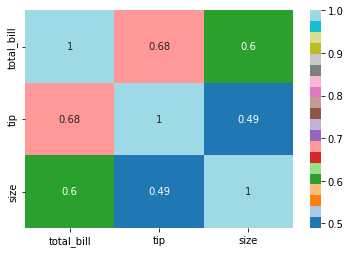

In [17]:
sns.heatmap(df.corr(),annot=True,cmap="tab20")

# Who loves smoking mostly and does that affect tip values when compared to non-smoking customers?

<AxesSubplot: xlabel='sex', ylabel='tip'>

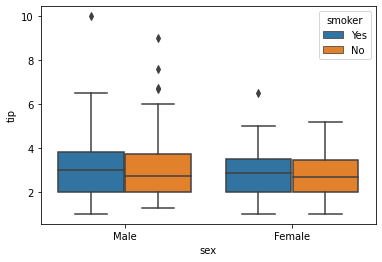

In [9]:

sns.boxplot(y=df["tip"],x=df["sex"],hue=df['smoker'])

In [11]:
df.groupby(['sex', 'smoker'])['tip'].mean()

sex     smoker
Male    Yes       3.051167
        No        3.113402
Female  Yes       2.931515
        No        2.773519
Name: tip, dtype: float64

# Show the pair plot based on sex variable

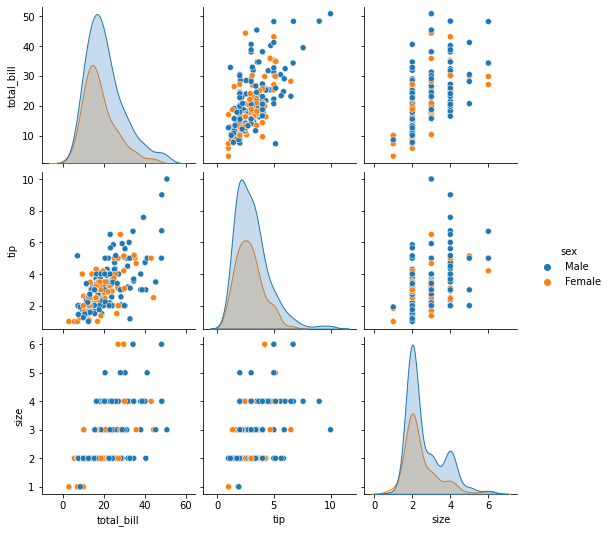

In [6]:
sns.pairplot(data=df,hue='sex')

# How many males and females are there?

In [9]:
df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

#### There is more men than women go to restaurants in their free time. Women don't want to rest in their free time they are working again and again. you can see about half the men, women come to the restaurant

# Who has paid more bill whether it is male or female?

In [10]:

df.query("total_bill == total_bill.max()")["sex"] 

170    Male
Name: sex, dtype: category
Categories (2, object): ['Male', 'Female']

<AxesSubplot: xlabel='sex', ylabel='total_bill'>

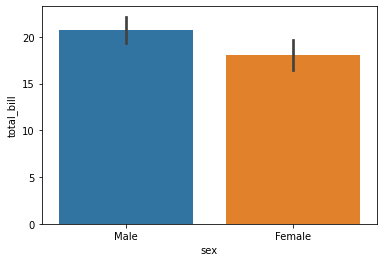

In [65]:
sns.barplot(data=df, y="total_bill",x="sex")

#### As you can see from the graph, men paid more bills than women. Because if both man and woman go together (may be date) then mostly men pay the bill if not so they both split the bill and pay. If lady comes with her friends or there is a celebration party then only lady pays

# Find the average total bill of male and female based on smoker attribute? 

In [14]:
df.groupby(['sex','smoker'])["total_bill"].mean()

sex     smoker
Male    Yes       22.284500
        No        19.791237
Female  Yes       17.977879
        No        18.105185
Name: total_bill, dtype: float64

# Who paying the more tip on sunday?


In [12]:
df[df["day"]=="Sun"].nlargest(1,"tip")["sex"]

183    Male
Name: sex, dtype: category
Categories (2, object): ['Male', 'Female']

In [13]:
df.query("day=='Sun'").query("tip==tip.max()")["sex"]

183    Male
Name: sex, dtype: category
Categories (2, object): ['Male', 'Female']

# Is there any relationship between total bills and tips

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

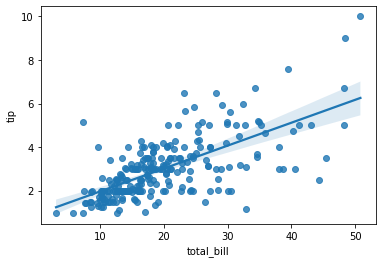

In [39]:
sns.regplot(data=df,x="total_bill",y="tip")

#### There is partially positive relationship between the tips and total bill. because mostly people give tips after they paid the bill. As you can see mostly people gives total bill between 5 dollars to 25 dollars


# Which gender has the most occupied space when the table size is 3

In [27]:
df[df["size"]==3]["sex"].value_counts()


Male      24
Female    14
Name: sex, dtype: int64

<AxesSubplot: xlabel='sex', ylabel='count'>

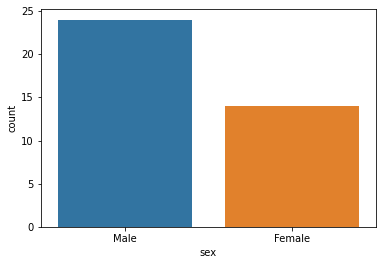

In [29]:
dff=df[df["size"]==3]
sns.countplot(data=dff,x="sex")

# What time do customers most prefer to visit the restaurant

<AxesSubplot: xlabel='time', ylabel='count'>

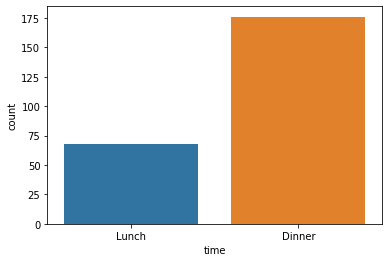

In [34]:
sns.countplot(data=df,x="time")

#### Most people go to their work during the day. Students go to school or college and adults go to office, so people do not have time to have lunch in restaurants. That's why they come to the restaurant at night.

# What is the different amout of data percentage with respect to gender ?How much higher is comparind to opposite gender

In [30]:
male=len(df[df["sex"]=="Male"])*100/len(df)
female=len(df[df["sex"]=="Female"])*100/len(df)
print(male)
print(female)

64.34426229508196
35.65573770491803


In [31]:
(len(df[df["sex"]=="Male"])-len(df[df["sex"]=="Female"]))*100/len(df)

28.688524590163933

# Which gender has offered most valuable tips when the total bill value is between 10 to 20 dollors

In [33]:
df.query("10 > total_bill < 20").nlargest(1,"tip")["sex"]

172    Male
Name: sex, dtype: category
Categories (2, object): ['Male', 'Female']

# Which of the table sizes 2 and 4 is often preferred?

In [45]:
df1=df[((df["size"]==2)|(df["size"]==4))]
df1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
237,32.83,1.17,Male,Yes,Sat,Dinner,2
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# On which day more customers are comming?

<AxesSubplot: xlabel='day', ylabel='count'>

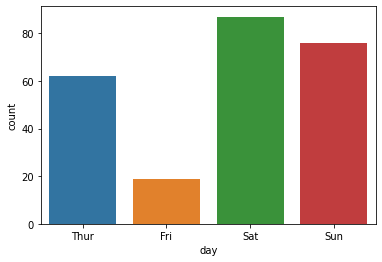

In [7]:
sns.countplot(data=df,x="day")

# Which day is more preferred for lunch time?

<AxesSubplot: xlabel='day', ylabel='count'>

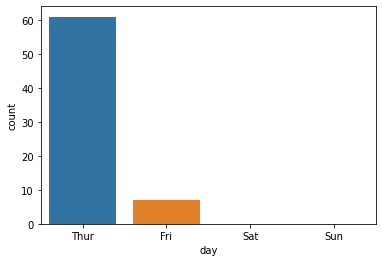

In [14]:
sns.countplot( data = df[df["time"]=="Lunch"],x="day")

<AxesSubplot: xlabel='day', ylabel='count'>

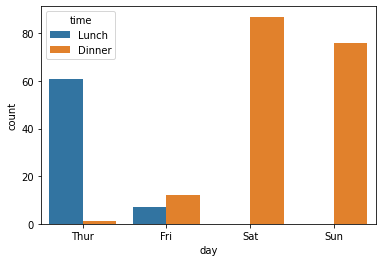

In [16]:
sns.countplot(x='day', data = df,hue="time")